In [35]:
import json
import string
import requests
from requests.exceptions import Timeout
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from scipy.stats import linregress
import csv 
import io


In [36]:
##### read data
fatality = pd.read_csv('data/accident.csv')
injury_property_damage = pd.read_csv('data/injury_and_property_damage_only.csv')
vehicle_miles = pd.read_csv('data/vehicle_miles.csv')
injury_property_damage

c:\Users\datqu\anaconda3\envs\bootcamp\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (28,30,32,58,64,66,86,88,90) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,caseyear,injury_only,property_damage_only
0,2010,1542104,3847045
1,2011,1529968,3777994
2,2012,1634180,3949858
3,2013,1591016,4065673
4,2014,1647726,4386502
5,2015,1715394,4548203
6,2016,2116308,4670073
7,2017,1888525,4529513
8,2018,1893704,4807058
9,2019,1916344,4806253


In [37]:
fatality.head()

,caseyear,state,st_case,statename,ve_total,ve_forms,pvh_invl,peds,pernotmvit,permvit,...,hosp_mn,hosp_mnname,cf1,cf1name,cf2,cf2name,cf3,cf3name,fatals,drunk_dr
0,2010,1,10001,Alabama,1,1,NaN,0,NaN,NaN,...,99,Unknown EMS Hospital Arrival Time,0.0,None,0.0,None,0.0,None,1,1
1,2010,1,10002,Alabama,1,1,NaN,0,NaN,NaN,...,99,Unknown EMS Hospital Arrival Time,0.0,None,0.0,None,0.0,None,1,0
2,2010,1,10003,Alabama,3,3,NaN,0,NaN,NaN,...,99,Unknown EMS Hospital Arrival Time,0.0,None,0.0,None,0.0,None,1,0
3,2010,1,10004,Alabama,2,2,NaN,0,NaN,NaN,...,88,Not Applicable (Not Transported),0.0,None,0.0,None,0.0,None,1,0
4,2010,1,10005,Alabama,2,2,NaN,0,NaN,NaN,...,88,Not Applicable (Not Transported),0.0,None,0.0,None,0.0,None,1,0


In [56]:
vehicle_miles

,caseyear,vehicle_miles_milions,mode
0,2010,5975.78,Air
1,2011,6004.58,Air
2,2012,5956.17,Air
3,2013,5964.98,Air
4,2014,5947.35,Air
5,2015,6045.82,Air
6,2016,6227.35,Air
7,2017,6337.80,Air
8,2018,6609.01,Air
9,2019,6815.00,Air


In [48]:
fatal_case_by_year = fatality.groupby(['caseyear']).count()['fatals'].reset_index()
fatal_case_by_year

,caseyear,fatals
0,2010,30626
1,2011,30210
2,2012,31358
3,2013,30516
4,2014,30343
5,2015,32835
6,2016,35017
7,2017,34841
8,2018,34214
9,2019,33762


In [66]:
# create summary table
# number of fatal_only crashes
fatal_case_by_year = fatality.groupby(['caseyear']).count()['fatals'].reset_index()
fatal_case_by_year.rename(columns={'fatals':'fatals_case_only'},inplace=True)
# number of death
death_by_year = fatality.groupby('caseyear').sum()['fatals'].reset_index()
summary_crash_case = fatal_case_by_year.merge(injury_property_damage,on='caseyear')
summary_crash_case = summary_crash_case.merge(death_by_year,on='caseyear')
summary_crash_case['total_crash'] = summary_crash_case.fatals_case_only + summary_crash_case.injury_only + summary_crash_case.property_damage_only
summary_crash_case = summary_crash_case.merge(vehicle_miles.loc[vehicle_miles['mode'] == 'Car',['caseyear','vehicle_miles_milions']],on='caseyear')
summary_crash_case['fatality_per_thousand_crash'] = summary_crash_case.fatals / summary_crash_case.total_crash * 1000
summary_crash_case['fatality_per_vmt'] = summary_crash_case.fatals / summary_crash_case.vehicle_miles_milions 
summary_crash_case

,caseyear,fatals_case_only,injury_only,property_damage_only,fatals,total_crash,vehicle_miles_milions,fatality_per_thousand_crash,fatality_per_vmt
0,2010,30626,1542104,3847045,33339,5419775,2967265.97,6.151362,0.011236
1,2011,30210,1529968,3777994,32840,5338172,2950401.81,6.151919,0.011131
2,2012,31358,1634180,3949858,34148,5615396,2969432.94,6.081138,0.011500
3,2013,30516,1591016,4065673,33237,5687205,2988280.19,5.844171,0.011122
4,2014,30343,1647726,4386502,33048,6064571,3025655.73,5.449355,0.010923
5,2015,32835,1715394,4548203,35794,6296432,3095372.70,5.684807,0.011564
6,2016,35017,2116308,4670073,38085,6821398,3174407.96,5.583166,0.011998
7,2017,34841,1888525,4529513,37763,6452879,3212347.31,5.852117,0.011756
8,2018,34214,1893704,4807058,37143,6734976,3240326.54,5.514942,0.011463
9,2019,33762,1916344,4806253,36644,6756359,3261771.66,5.423631,0.011234


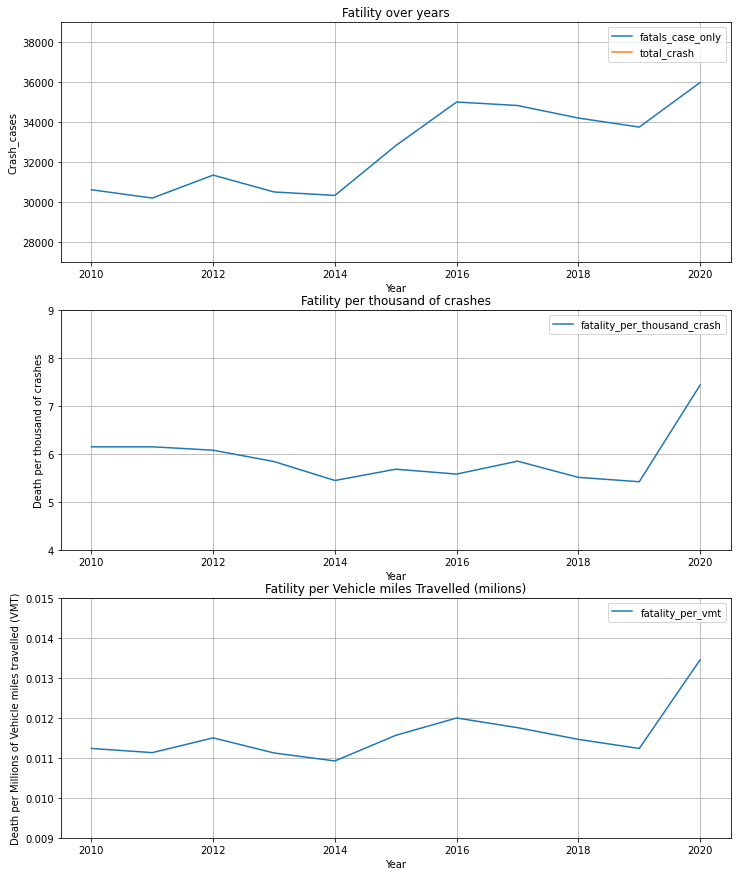

In [72]:
# plot total fatals per year
fig, (p1,p2,p3) = plt.subplots(3,figsize=(12, 15))
summary_crash_case.plot.line(x='caseyear',y='fatals_case_only',ax=p1,title='Fatility over years')
summary_crash_case.plot.line(x='caseyear',y='total_crash',ax=p1,title='Fatility over years')
p1.set_ylim(27000,39000)
p1.set_xlabel("Year")
p1.set_ylabel('Crash_cases')
p1.grid()
summary_crash_case.plot.line(x='caseyear',y='fatality_per_thousand_crash',ax=p2,title='Fatility per thousand of crashes')
p2.set_ylim(4,9)
p2.set_xlabel("Year")
p2.set_ylabel('Death per thousand of crashes')
p2.grid()
summary_crash_case.plot.line(x='caseyear',y='fatality_per_vmt',ax=p3,title='Fatility per Vehicle miles Travelled (milions)')
p3.set_ylim(0.009,0.015)
p3.set_xlabel("Year")
p3.set_ylabel('Death per Millions of Vehicle miles travelled (VMT)')
p3.grid()
